_______________________
# Assessment for DE Internship at DataGrokr
_______________________
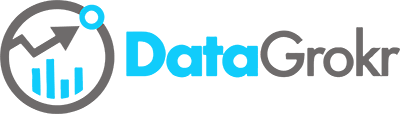


### Table of Contents

**[Section 1: Environment setup and Data Cleaning](#section-1)**

**[Section 2: Data Analysis](#Data-Analysis)**

**[Section 3: Exposing results in API](#re)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/DE_SOLUTION_Mohammed_Aftab.')

### Import necessary Dependencies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<a id="section-1"></a>
# SECTION 1: Environment setup and Data cleaning

### Load the Data

In [ ]:
df=pd.read_csv('HousingDataset.csv',lineterminator='\n')
df.head()

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,107397,YhXDVa/KIlF7EjJMulHiyA==,Propiedad,2020-03-26,2020-04-08,2020-03-26,-34.562465,-58.465079,Argentina,Capital Federal,...,2.0,NaN,NaN,220000.0,USD,NaN,OPPEL | Departamento en Venta | Cod: 29583,DEPARTAMENTO EN VENTA / ALQUILER | BELGRANO ...,Departamento,Venta
1,918839,jHxD7psAg4+AC07T3sognw==,Propiedad,2020-03-08,2020-03-09,2020-03-08,-37.999235,-57.553724,Argentina,Buenos Aires Costa Atlántica,...,1.0,NaN,NaN,155000.0,USD,NaN,2 AMBIENTES A ESTRENAR CON COCHERA,2 AMBIENTES CON BALCON Y PARRILLA. COCHERALIV...,Otro,Venta
2,204435,IYPdaIGi5Obo4eLzwUY+LA==,Propiedad,2020-10-26,2021-02-03,2020-10-26,-34.453307,-58.649410,Argentina,Bs.As. G.B.A. Zona Norte,...,3.0,900.0,310.0,480000.0,USD,Mensual,"Casa en Venta, Barrio Sta. Barbara","Casa racionalista en tres plantas, con espacio...",Casa,Venta
3,699972,Cc8bVzOhRcPnAYS++8oyMg==,Propiedad,2020-01-07,2020-01-07,2020-01-07,-31.635173,-60.716072,Argentina,Santa Fe,...,4.0,NaN,NaN,34000.0,ARS,Mensual,"Casa en Alquiler en Constituyentes, Santa fe $...",ALQUILER DE CASA DE 3 / 4 DORMITORIOS EN ZONA ...,Casa,Alquiler
4,66130,83DDzQ7686eLxOi9sQNJVA==,Propiedad,2020-05-13,2020-05-17,2020-05-13,NaN,NaN,Argentina,Santa Fe,...,2.0,200.0,200.0,20000.0,ARS,NaN,Laprida 1418,Laprida 1418 - KP27922 - - Aviso publicado po...,Casa,Alquiler


In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'ad_type', 'start_date', 'end_date', 'created_on',
       'lat', 'lon', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms',
       'bathrooms', 'surface_total', 'surface_covered', 'price', 'currency',
       'price_period', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

### Breif information of  Data Set

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       500000 non-null  int64  
 1   id               500000 non-null  object 
 2   ad_type          500000 non-null  object 
 3   start_date       500000 non-null  object 
 4   end_date         500000 non-null  object 
 5   created_on       500000 non-null  object 
 6   lat              424515 non-null  float64
 7   lon              424065 non-null  float64
 8   l1               500000 non-null  object 
 9   l2               500000 non-null  object 
 10  l3               473344 non-null  object 
 11  l4               119679 non-null  object 
 12  l5               2498 non-null    object 
 13  l6               0 non-null       float64
 14  rooms            262826 non-null  float64
 15  bedrooms         232669 non-null  float64
 16  bathrooms        388149 non-null  floa

### Data Preprocessing
• Identify and remove the following columns:
a. ad_type
b. title
c. description
d. l4
e. l5
f. l6

• Investigate and discard all rows that contain Null values in any of these fields:
a. lon
b. lat
c. price_period
d. bedrooms
e. surface_total
f. rooms
g. price
h. surface_covered

• Once cleaning is done, separate the DF into 2 Tables. One with property_details and another with property_price_details
and load them into SQL database on your local (Ex. SQLite, sqlalchemy). Columns for each should be given as mentioned
below

**I adhered strictly to minimal preprocessing as instructed, without making any additional alterations to the original data, ensuring data integrity and compliance with project requirements.**

In [ ]:
df = df.drop(['ad_type', 'title', 'description', 'l4', 'l5', 'l6'], axis=1)

In [ ]:
df=df.dropna(subset = ['lon', 'lat', 'price_period', 'bedrooms', 'surface_total', 'rooms', 'price', 'surface_covered'])

In [ ]:
property_details = df [['id', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3', 'rooms', 'bedrooms', 'bathrooms',
'surface_total', 'surface_covered']]

In [ ]:
# property_details['id']=property_details['id'].str.rstrip('==')

In [ ]:

property_price_details = df[['id', 'price', 'currency', 'price_period', 'property_type', 'operation_type']]

In [ ]:
# property_price_details['id']=property_price_details['id'].str.rstrip('==')


In [ ]:
property_details.head()

,id,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered
15,5Be4XjP4b1Olk02vXOHLqA==,2020-07-31,2020-08-28,2020-07-31,-34.557563,-58.442389,Argentina,Capital Federal,Belgrano,4.0,3.0,4.0,155.0,150.0
27,V+6946R1DSniL3DToznOBw==,2020-12-16,2020-12-17,2020-12-16,-34.602959,-58.462030,Argentina,Capital Federal,Paternal,4.0,3.0,3.0,181.0,181.0
99,w0i2gQ7n18T4QYlI3gHjtg==,2021-01-05,9999-12-31,2021-01-05,-34.579070,-58.403829,Argentina,Capital Federal,Palermo,4.0,2.0,2.0,230.0,211.0
112,+FVdVVYFmNvza0tOpXfi/A==,2020-06-04,2020-06-25,2020-06-04,-34.797896,-58.385961,Argentina,Bs.As. G.B.A. Zona Sur,Almirante Brown,3.0,2.0,2.0,70.0,65.0
123,Fg4t539n8vLsWIEQbZ4yPw==,2020-10-22,2020-10-31,2020-10-22,-34.599525,-58.403537,Argentina,Capital Federal,Balvanera,1.0,1.0,1.0,40.0,36.0


In [ ]:
property_price_details.head()



,id,price,currency,price_period,property_type,operation_type
15,5Be4XjP4b1Olk02vXOHLqA==,195000.0,ARS,Mensual,Departamento,Alquiler
27,V+6946R1DSniL3DToznOBw==,235000.0,USD,Mensual,PH,Venta
99,w0i2gQ7n18T4QYlI3gHjtg==,2500.0,USD,Mensual,Departamento,Alquiler
112,+FVdVVYFmNvza0tOpXfi/A==,195000.0,USD,Mensual,Departamento,Venta
123,Fg4t539n8vLsWIEQbZ4yPw==,89999.0,USD,Mensual,Departamento,Venta


### To export Data Frames to Local Mysql Workbench


To export DataFrames to a local MySQL Workbench, I encountered several unsuccessful methods. The primary challenge was accessing a locally hosted database from the Google Colab server, given their geographical separation. Google Colab creates instances on-the-fly, and to address this issue, I leveraged NGROK (https://ngrok.com). NGROK allows us to expose the localhost to the web, enabling secure and immediate access to remote systems without the need to modify network settings or open ports on our router.

In [ ]:
!pip install pymysql
!pip install cryptography

In [ ]:
import pymysql
from sqlalchemy import create_engine,text


In [ ]:
host='0.tcp.in.ngrok.io'
pw='admin'
charset='utf8'
user='root'
db='new_schema'
port='14272'
engine=create_engine(f"mysql+pymysql://{user}:{pw}@{host}:{port}/{db}")

# new_schema is the Database name which i created locally
# pw and user is the  password and username of Mysql
# host is ngrok which helps to host the local to web
# port is the unique access id/port number provided by ngrok

In [ ]:
property_details.to_sql('property_details', engine, if_exists='replace', index=False)
property_price_details.to_sql('property_price_details', engine, if_exists='replace', index=False)
# already execution  is done so these tables are now present in my local new_schema db
# execute only once

43436

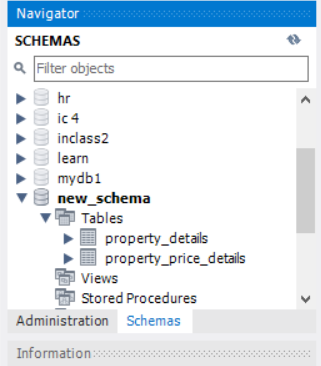

**This is how it would look like in my Local DB new_schema now has two tables**

<a id="Data-Analysis"></a>
# Section 2: Data Analysis

After establishing a connection between Google Colab and my local database, I conducted data analysis directly in the Colab environment by running SQL queries. However, I also prepared a SQL script using MySQL Workbench, which will be provided as an additional resource.


**Question 1)** Retrieve properties that have a price greater than 1 million and are located in "Estados Unidos" (l1).

In [ ]:
query="""SELECT pd.*
FROM property_details pd
JOIN property_price_details ppd ON pd.id = ppd.id
WHERE ppd.price > 1000000 -- 1 million
  AND pd.l1 = 'Estados Unidos';"""

In [ ]:
Q1_df=pd.read_sql_query(sql=text(query),con=engine.connect())


In [ ]:
Q1_df.head()

,id,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,jia0r061K3bw5GPCHag4/Q==,2020-10-26,9999-12-31,2020-10-26,25.764355,-80.193021,Estados Unidos,Florida,None,2.0,1.0,1.0,87.0,87.0
1,swvA3wM1Df6lwOBx4ciKJg==,2020-09-15,9999-12-31,2020-09-15,25.887595,-80.131156,Estados Unidos,Florida,None,3.0,2.0,2.0,242.0,168.0
2,4tMKIwmJObpzvXuT/fFPnQ==,2020-03-04,2020-10-16,2020-03-04,25.951994,-80.119970,Estados Unidos,Florida,None,9.0,3.0,5.0,373.0,283.0
3,7Aa4z2SWO2mp+P/JXdTmsA==,2020-03-04,2020-10-16,2020-03-04,25.951994,-80.119970,Estados Unidos,Florida,None,9.0,4.0,5.0,530.0,385.0
4,fAv1rqL0LHZOiqDaDNwrzA==,2020-03-04,2020-10-16,2020-03-04,25.951994,-80.119970,Estados Unidos,Florida,None,5.0,2.0,2.0,206.0,123.0


**Question 2)** Categorize properties based on their surface area as 'Small' if it's less than 50 square meters, 'Medium' if it's between 50 and 100 square meters, and 'Large' if it's greater than 100 square meters:

In [ ]:
query="""SELECT pd.*,
  CASE
    WHEN pd.surface_total < 50 THEN 'Small'
    WHEN pd.surface_total >= 50 AND pd.surface_total <= 100 THEN 'Medium'
    ELSE 'Large'
  END AS surface_category
FROM property_details pd;"""

In [ ]:
Q2_df=pd.read_sql_query(sql=text(query),con=engine.connect())


In [ ]:
Q2_df.head()


,id,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,surface_category
0,5Be4XjP4b1Olk02vXOHLqA==,2020-07-31,2020-08-28,2020-07-31,-34.557563,-58.442389,Argentina,Capital Federal,Belgrano,4.0,3.0,4.0,155.0,150.0,Large
1,V+6946R1DSniL3DToznOBw==,2020-12-16,2020-12-17,2020-12-16,-34.602959,-58.462030,Argentina,Capital Federal,Paternal,4.0,3.0,3.0,181.0,181.0,Large
2,w0i2gQ7n18T4QYlI3gHjtg==,2021-01-05,9999-12-31,2021-01-05,-34.579070,-58.403829,Argentina,Capital Federal,Palermo,4.0,2.0,2.0,230.0,211.0,Large
3,+FVdVVYFmNvza0tOpXfi/A==,2020-06-04,2020-06-25,2020-06-04,-34.797896,-58.385961,Argentina,Bs.As. G.B.A. Zona Sur,Almirante Brown,3.0,2.0,2.0,70.0,65.0,Medium
4,Fg4t539n8vLsWIEQbZ4yPw==,2020-10-22,2020-10-31,2020-10-22,-34.599525,-58.403537,Argentina,Capital Federal,Balvanera,1.0,1.0,1.0,40.0,36.0,Small


**Question 3)** List all properties (id) in the "Belgrano" neighborhood (l3) that have the same number of bedrooms and bathrooms as another property in the dataset

In [ ]:
query="""SELECT DISTINCT p1.id
FROM property_details p1
INNER JOIN property_details p2 ON p1.id <> p2.id
WHERE p1.l3 = 'Belgrano'
  AND p1.bedrooms = p2.bedrooms
  AND p1.bathrooms = p2.bathrooms;"""

In [ ]:
q3_df=pd.read_sql_query(sql=text(query),con=engine.connect())


In [ ]:
q3_df.head()


,id
0,YSkNUj+ijhpfUC1utFmFfw==
1,UDd6/GU3MFX7pL+8abdG2Q==
2,aQEKqyyh3GV+AIG+Srmuyw==
3,4Wep5R4gBFHDjvqHn4VhPw==
4,lL4hpXy9TelZAcha/LT7Ew==


**Question 4)** Calculate the average price per square meter (price / surface_total) for each property type (property_type) in the "Belgrano" neighborhood (l3)

In [ ]:
query="""SELECT
  ppd.property_type,
  AVG(ppd.price / pd.surface_total) AS avg_price_per_sq_meter
FROM property_details pd
INNER JOIN property_price_details ppd ON pd.id = ppd.id
WHERE pd.l3 = 'Belgrano'
GROUP BY ppd.property_type;"""

In [ ]:
q4_df=pd.read_sql_query(sql=text(query),con=engine.connect())


In [ ]:
q4_df.head()



,property_type,avg_price_per_sq_meter
0,Departamento,2560.767096
1,PH,1955.004266
2,Casa,2146.914530
3,Oficina,1895.035734
4,Local comercial,1986.436629


**Question 5)** Identify properties that have a higher price than the average price of properties with the same number of bedrooms and bathrooms.

In [ ]:
query="""SELECT
    bedrooms,
    bathrooms,
    AVG(price) AS average_price
FROM
    property_details
INNER JOIN
    property_price_details ON property_details.id = property_price_details.id
GROUP BY
    bedrooms, bathrooms;"""

In [ ]:
q5_df=pd.read_sql_query(sql=text(query),con=engine.connect())


In [ ]:
q5_df.head()


,bedrooms,bathrooms,average_price
0,3.0,4.0,657674.263245
1,3.0,3.0,486529.733554
2,2.0,2.0,410270.643786
3,1.0,1.0,238058.306365
4,5.0,3.0,438030.635593


In [ ]:
query2= """SELECT
    property_details.id,
    bedrooms,
    bathrooms,
    price
FROM
    property_details
INNER JOIN
    property_price_details ON property_details.id = property_price_details.id
WHERE
    price > (
        SELECT
            AVG(price)
        FROM
            property_details as pd
        INNER JOIN
            property_price_details as ppd ON pd.id = ppd.id
        WHERE
            pd.bedrooms = property_details.bedrooms AND
            pd.bathrooms = property_details.bathrooms
    );"""

**Question 6)** Calculate the cumulative price for each property type, ordered by the creation date


In [ ]:
query="""SELECT
    pd.id,
    ppd.property_type,
    pd.created_on,
    ppd.price,
    SUM(ppd.price) OVER (PARTITION BY ppd.property_type ORDER BY pd.created_on) AS cumulative_price
FROM
    property_details pd
INNER JOIN
    property_price_details ppd ON pd.id = ppd.id
ORDER BY
    ppd.property_type, pd.created_on;"""


In [ ]:
q6_df=pd.read_sql_query(sql=text(query),con=engine.connect())


In [ ]:
q6_df.head()


,id,property_type,created_on,price,cumulative_price
0,5NR2RTibJiNxOw8l8wDNLg==,Casa,2020-01-08,75000.0,75000.0
1,yXQ6cJ+F872CuPZ+KEX6Zg==,Casa,2020-01-16,130000.0,1313000.0
2,CALIsdd0Iu5Q/G97tIptYg==,Casa,2020-01-16,69000.0,1313000.0
3,kX0veAloeejR7ZQ+aM76Yw==,Casa,2020-01-16,79000.0,1313000.0
4,hinztZFkgIhruBZlmIUSow==,Casa,2020-01-16,55000.0,1313000.0


**Question 7)** Identify the 10 locations (l3) with the highest total surface area (sum of surface_total) of properties listed for sale (operation_type = 'Venta'):

In [ ]:
query="""SELECT
    pd.l3,
    SUM(pd.surface_total) AS total_surface_area
FROM
    property_details pd
INNER JOIN
    property_price_details ppd ON pd.id = ppd.id
WHERE
    ppd.operation_type = 'Venta'
GROUP BY
    pd.l3
ORDER BY
    total_surface_area DESC
LIMIT 10;"""


In [ ]:
q7_df=pd.read_sql_query(sql=text(query),con=engine.connect())


In [ ]:
q7_df.head()

,l3,total_surface_area
0,Tigre,454465.0
1,Rosario,331595.0
2,Palermo,249909.0
3,Pilar,214308.0
4,Belgrano,213462.0


**Question 8)** Find the top 5 most expensive properties (based on price) in the "Palermo" neighborhood (l3) that were listed in August 2020:

In [ ]:
query="""SELECT
    pd.id,
    pd.l3,
    ppd.price,
    pd.created_on
FROM
    property_details pd
INNER JOIN
    property_price_details ppd ON pd.id = ppd.id
WHERE
    pd.l3 = 'Palermo'
    AND pd.created_on >= '2020-08-01'
    AND pd.created_on < '2020-09-01'
ORDER BY
    ppd.price DESC
LIMIT 5;
"""


In [ ]:
q8_df=pd.read_sql_query(sql=text(query),con=engine.connect())


In [ ]:
q8_df.head()


,id,l3,price,created_on
0,USMCY74tSt/w7kt5ACB1lQ==,Palermo,4000000.0,2020-08-30
1,dM8I+dJjssyb8HvbbBnCHw==,Palermo,1980000.0,2020-08-11
2,KXKexQ3CiqHowcWRBmaxYQ==,Palermo,1650000.0,2020-08-08
3,JbwB3v6R0C4rW97pcK4hIw==,Palermo,1350000.0,2020-08-13
4,nujZFNyu/t93+/ZigbmzLA==,Palermo,1349000.0,2020-08-22


**Question 9)** Find the top 3 properties with the highest price per square meter (price divided by surface area) within each property type.

In [ ]:
query="""WITH RankedProperties AS (
  SELECT
    pd.id,
    ppd.property_type,
    pd.surface_total,
    ppd.price / pd.surface_total AS price_per_sq_meter,
    ROW_NUMBER() OVER (PARTITION BY ppd.property_type ORDER BY ppd.price / pd.surface_total DESC) AS rank_within_type
  FROM
    property_details pd
  INNER JOIN
    property_price_details ppd ON pd.id = ppd.id
)

SELECT
  id,
  property_type,
  surface_total,
  price_per_sq_meter
FROM
  RankedProperties
WHERE
  rank_within_type <= 3;
  """


In [ ]:
q9_df=pd.read_sql_query(sql=text(query),con=engine.connect())


In [ ]:
q9_df.head()


,id,property_type,surface_total,price_per_sq_meter
0,4uEUcuIO6yA9ZD4PBAXjVw==,Casa,131.0,277862.595420
1,PowAluD2jcoKjBuOE8eALw==,Casa,115.0,198345.130435
2,ujrbSEDO6JqQ3boPSGuc2A==,Casa,70.0,194285.714286
3,L/hHlfmnL44avxcBKaEdFA==,Casa de campo,1537.0,253.741054
4,lkb1/y0lWTtuynnIXk/3vQ==,Casa de campo,2540.0,157.086614


**Question 10)**  Find the top 3 locations (l1, l2, l3) with the highest average price per square meter (price / surface_total) for properties listed for sale (operation_type = 'Venta') in the year 2020. Exclude locations with fewer than 10 properties listed for sale in 2020 from the results.

In [ ]:
query="""WITH LocationAvgPrice AS (
  SELECT
    pd.l1,
    pd.l2,
    pd.l3,
    AVG(ppd.price / pd.surface_total) AS avg_price_per_sq_meter
  FROM
    property_details pd
  INNER JOIN
    property_price_details ppd ON pd.id = ppd.id
  WHERE
    ppd.operation_type = 'Venta'
    AND YEAR(pd.created_on) = 2020
  GROUP BY
    pd.l1, pd.l2, pd.l3
  HAVING
    COUNT(*) >= 10
)

SELECT
  l1,
  l2,
  l3,
  avg_price_per_sq_meter
FROM
  LocationAvgPrice
ORDER BY
  avg_price_per_sq_meter DESC
LIMIT 3;"""

In [ ]:
q10_df=pd.read_sql_query(sql=text(query),con=engine.connect())


In [ ]:
q10_df.head()

,l1,l2,l3,avg_price_per_sq_meter
0,Argentina,Santa Fe,San Lorenzo,32729.571284
1,Argentina,Tucumán,San Miguel de Tucumán,24963.582022
2,Argentina,Neuquén,Confluencia,23968.471396


<a id="re"></a>
# Section 3: Expose the results in API
In Section 3 of the project, I successfully implemented a Flask API to showcase the solutions. I followed industry norms by employing the GET HTTP method for local testing within Jupyter Notebook, ensuring clean code and improved interpretability. Additionally, I utilized the Ngrok method in Google Colab to compare and validate the functionality, ensuring a robust and versatile solution.In Both methods i utilized  SQLAlchemyError and some basic Exception handling techniques that handles unexpected errors,That Separate File is Named as 'Flask API Local Host Get HTTP.ipynb' which is also Present in DE_SOLUTION_Mohammed_Aftab

### Exposing the results in API Using Ngrok

In [ ]:
# install libraries
!pip install flask-ngrok
!pip install pyngrok
pip install sqlalchemy==1.3.20


### Import Required Dependencies  

In [ ]:
from flask import Flask,jsonify
from pyngrok import ngrok
import json
from sqlalchemy.exc import SQLAlchemyError
import pymysql
from sqlalchemy import create_engine,text


### Create a Connection  to Communicate With Local Data Base

In [ ]:
host='0.tcp.in.ngrok.io'
pw='admin'
charset='utf8'
user='root'
db='new_schema'
port='14272'
engine=create_engine(f"mysql+pymysql://{user}:{pw}@{host}:{port}/{db}")

In [ ]:
# We will Run on Default Port Itself that is 5000,Which can/Optional to Change Manually ,A port number is a 16-bit integer that ranges from 0 to 65535
port_no=5000

### Question 1 : Retrieve properties that have a price greater than 1 million and are located in "Estados Unidos" (l1).
access url - https://eaab-35-227-79-242.ngrok-free.app/Question1

In [ ]:
app = Flask(__name__)
ngrok.set_auth_token("2VjZiW8VGm6is76RlRaxe4XjJGG_4zzdrjWD2cDxwYYmCWE59")
public_url =  ngrok.connect(port_no).public_url
@app.route('/Question1', methods=['GET'])
def Question1():
    try:
        query = """
        SELECT pd.*
        FROM property_details pd
        JOIN property_price_details ppd ON pd.id = ppd.id
        WHERE ppd.price > 1000000 -- 1 million
        AND pd.l1 = 'Estados Unidos';
        """

        try:                                              # Execute the SQL query and store the results in a DataFrame
            q1_df = pd.read_sql_query(sql=query, con=engine)
        except SQLAlchemyError as e:                      # Handle database-related errors
            error_message = str(e)
            return jsonify({"error": error_message}), 500  # HTTP 500 Internal Server Error

        if q1_df.empty:                                   #Handle the case when no data is found
            return jsonify({"message": "No data found"}), 404  # HTTP 404 Not Found

        response = q1_df.to_json(orient='records', indent=4) # Convert the DataFrame to JSON format

        return response

# Handle other unexpected errors

    except Exception as e:
        error_message = str(e)
        return jsonify({"error": error_message}), 500
print(f"To acces the Global link please click {public_url}")



app.run(port=port_no)
# This code snippet sets up a Flask application with an endpoint for Question 1. It connects to a local database, executes an SQL query, and returns the query results as JSON.
#  Error handling is included to handle various scenarios, such as database errors and cases
#  where no data is found. The ngrok service is used to provide global access to the Flask app.the code must be running for the results to be accessible through the provided URL.

To acces the Global link please click https://eaab-35-227-79-242.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 13:47:23] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 13:47:24] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 13:47:34] "GET /Question1 HTTP/1.1" 200 -


### Question 2 : Categorize properties based on their surface area as 'Small' if it's less than 50 square meters, 'Medium' if it's between 50 and 100 square meters, and 'Large' if it's greater than 100 square meters:

access url - https://6ab2-35-227-79-242.ngrok-free.app/Question2

In [ ]:
app = Flask(__name__)
public_url =  ngrok.connect(port_no).public_url
@app.route('/Question2', methods=['GET'])
def Question2():
    try:
        query = """  SELECT pd.*,
        CASE
            WHEN pd.surface_total < 50 THEN 'Small'
            WHEN pd.surface_total >= 50 AND pd.surface_total <= 100 THEN 'Medium'
            ELSE 'Large'
        END AS surface_category
        FROM property_details pd;"""

        try:
            q1_df = pd.read_sql_query(sql=query, con=engine)
        except SQLAlchemyError as e:
            error_message = str(e)
            return jsonify({"error": error_message}), 500

        if q1_df.empty:
            return jsonify({"message": "No data found"}), 404

        response = q1_df.to_json(orient='records', indent=4)

        return response


    except Exception as e:
        error_message = str(e)
        return jsonify({"error": error_message}), 500
print(f"To acces the Global link please click {public_url}")


app.run(port=port_no)


To acces the Global link please click https://6ab2-35-227-79-242.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 13:56:42] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 13:56:43] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 13:57:07] "GET /Question2 HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 13:57:53] "GET /Question2 HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 13:58:13] "GET /Question2 HTTP/1.1" 200 -


### Question 3 :  List all properties (id) in the "Belgrano" neighborhood (l3) that have the same number of bedrooms and bathrooms as another property in the dataset
access url - https://e1ac-35-227-79-242.ngrok-free.app/Question3


In [ ]:
app = Flask(__name__)
public_url =  ngrok.connect(port_no).public_url
@app.route('/Question3', methods=['GET'])
def Question3():
    try:
        query = """SELECT DISTINCT p1.id
        FROM property_details p1
        INNER JOIN property_details p2 ON p1.id <> p2.id
        WHERE p1.l3 = 'Belgrano'
          AND p1.bedrooms = p2.bedrooms
          AND p1.bathrooms = p2.bathrooms;"""

        try:
            q1_df = pd.read_sql_query(sql=query, con=engine)
        except SQLAlchemyError as e:
            error_message = str(e)
            return jsonify({"error": error_message}), 500

        if q1_df.empty:
            return jsonify({"message": "No data found"}), 404

        response = q1_df.to_json(orient='records', indent=4)

        return response


    except Exception as e:
        error_message = str(e)
        return jsonify({"error": error_message}), 500
print(f"To acces the Global link please click {public_url}")


app.run(port=port_no)


To acces the Global link please click https://e1ac-35-227-79-242.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 14:01:54] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 14:01:55] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 14:01:58] "GET /Question3 HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 14:02:31] "GET /Question3 HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 14:02:34] "GET /Question3 HTTP/1.1" 200 -


### Question 4 : Calculate the average price per square meter (price / surface_total) for each property type (property_type) in the "Belgrano" neighborhood (l3)

access url - https://a25f-35-227-79-242.ngrok-free.app/Question4

In [ ]:
app = Flask(__name__)
public_url =  ngrok.connect(port_no).public_url
@app.route('/Question4', methods=['GET'])
def Question4():
    try:
        query = """SELECT
        ppd.property_type,
        AVG(ppd.price / pd.surface_total) AS avg_price_per_sq_meter
        FROM property_details pd
        INNER JOIN property_price_details ppd ON pd.id = ppd.id
        WHERE pd.l3 = 'Belgrano'
        GROUP BY ppd.property_type;"""

        try:
            q1_df = pd.read_sql_query(sql=query, con=engine)
        except SQLAlchemyError as e:
            error_message = str(e)
            return jsonify({"error": error_message}), 500

        if q1_df.empty:
            return jsonify({"message": "No data found"}), 404

        response = q1_df.to_json(orient='records', indent=4)

        return response


    except Exception as e:
        error_message = str(e)
        return jsonify({"error": error_message}), 500
print(f"To acces the Global link please click {public_url}")


app.run(port=port_no)


To acces the Global link please click https://a25f-35-227-79-242.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 14:04:32] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 14:04:32] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 14:04:39] "GET /Question4 HTTP/1.1" 200 -


### Question 5 :Identify properties that have a higher price than the average price of properties with the same number of bedrooms and bathrooms.
access url - https://75b7-35-227-79-242.ngrok-free.app/Question5

In [ ]:
app = Flask(__name__)
public_url =  ngrok.connect(port_no).public_url
@app.route('/Question5', methods=['GET'])
def Question5():
    try:
        query = """SELECT
        bedrooms,
        bathrooms,
        AVG(price) AS average_price
        FROM
        property_details
        INNER JOIN
        property_price_details ON property_details.id = property_price_details.id
        GROUP BY
        bedrooms, bathrooms;"""

        try:
            q1_df = pd.read_sql_query(sql=query, con=engine)
        except SQLAlchemyError as e:
            error_message = str(e)
            return jsonify({"error": error_message}), 500

        if q1_df.empty:
            return jsonify({"message": "No data found"}), 404

        response = q1_df.to_json(orient='records', indent=4)

        return response


    except Exception as e:
        error_message = str(e)
        return jsonify({"error": error_message}), 500
print(f"To acces the Global link please click {public_url}")


app.run(port=port_no)


To acces the Global link please click https://75b7-35-227-79-242.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 14:09:16] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 14:09:17] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 14:09:25] "GET /Question5 HTTP/1.1" 200 -


### Question 6 : Calculate the cumulative price for each property type, ordered by the creation date

access url- https://11d6-35-227-79-242.ngrok-free.app/Question6

In [ ]:
app = Flask(__name__)
public_url =  ngrok.connect(port_no).public_url
@app.route('/Question6', methods=['GET'])
def Question6():
    try:
        query = """SELECT
        pd.id,
        ppd.property_type,
        pd.created_on,
        ppd.price,
        SUM(ppd.price) OVER (PARTITION BY ppd.property_type ORDER BY pd.created_on) AS cumulative_price
        FROM
        property_details pd
        INNER JOIN
        property_price_details ppd ON pd.id = ppd.id
        ORDER BY
        ppd.property_type, pd.created_on;"""

        try:
            df = pd.read_sql_query(sql=query, con=engine)
        except SQLAlchemyError as e:
            error_message = str(e)
            return jsonify({"error": error_message}), 500

        if df.empty:
            return jsonify({"message": "No data found"}), 404

        response = df.to_json(orient='records', indent=4)

        return response


    except Exception as e:
        error_message = str(e)
        return jsonify({"error": error_message}), 500
print(f"To acces the Global link please click {public_url}")


app.run(port=port_no)


To acces the Global link please click https://11d6-35-227-79-242.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 14:11:27] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 14:11:28] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 14:11:47] "GET /Question6 HTTP/1.1" 200 -


### Question 7:   Identify the 10 locations (l3) with the highest total surface area (sum of surface_total) of properties listed for sale (operation_type = 'Venta'):
access url - https://ca4e-35-227-79-242.ngrok-free.app/Question7

In [ ]:
app = Flask(__name__)
public_url =  ngrok.connect(port_no).public_url
@app.route('/Question7', methods=['GET'])
def Question7():
    try:
        query = """SELECT
        pd.l3,
        SUM(pd.surface_total) AS total_surface_area
        FROM
        property_details pd
        INNER JOIN
        property_price_details ppd ON pd.id = ppd.id
        WHERE
        ppd.operation_type = 'Venta'
        GROUP BY
        pd.l3
        ORDER BY
        total_surface_area DESC
        LIMIT 10;"""

        try:
            df = pd.read_sql_query(sql=query, con=engine)
        except SQLAlchemyError as e:
            error_message = str(e)
            return jsonify({"error": error_message}), 500

        if df.empty:
            return jsonify({"message": "No data found"}), 404

        response = df.to_json(orient='records', indent=4)

        return response


    except Exception as e:
        error_message = str(e)
        return jsonify({"error": error_message}), 500
print(f"To acces the Global link please click {public_url}")


app.run(port=port_no)


To acces the Global link please click https://ca4e-35-227-79-242.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 14:14:04] "GET /Question7 HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 14:14:05] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 14:14:19] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 14:14:27] "GET /Question7 HTTP/1.1" 200 -


### Question 8 :  Find the top 5 most expensive properties (based on price) in the "Palermo" neighborhood (l3) that were listed in August 2020:
access url- https://8a40-35-227-79-242.ngrok-free.app/Question8

In [ ]:
app = Flask(__name__)
public_url =  ngrok.connect(port_no).public_url
@app.route('/Question8', methods=['GET'])
def Question8():
    try:
        query = """SELECT
        pd.id,
        pd.l3,
        ppd.price,
        pd.created_on
        FROM
        property_details pd
        INNER JOIN
        property_price_details ppd ON pd.id = ppd.id
        WHERE
        pd.l3 = 'Palermo'
        AND pd.created_on >= '2020-08-01'
        AND pd.created_on < '2020-09-01'
        ORDER BY
        ppd.price DESC
        LIMIT 5;"""

        try:
            df = pd.read_sql_query(sql=query, con=engine)
        except SQLAlchemyError as e:
            error_message = str(e)
            return jsonify({"error": error_message}), 500

        if df.empty:
            return jsonify({"message": "No data found"}), 404

        response = df.to_json(orient='records', indent=4)

        return response


    except Exception as e:
        error_message = str(e)
        return jsonify({"error": error_message}), 500
print(f"To acces the Global link please click {public_url}")


app.run(port=port_no)


To acces the Global link please click https://8a40-35-227-79-242.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 14:16:02] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 14:16:03] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 14:16:11] "GET /Question8 HTTP/1.1" 200 -


### Question 9 :   Find the top 3 properties with the highest price per square meter (price divided by surface area) within each property type.
access url - https://335e-35-227-79-242.ngrok-free.app/Question9

In [ ]:
app = Flask(__name__)
public_url =  ngrok.connect(port_no).public_url
@app.route('/Question9', methods=['GET'])
def Question9():
    try:
        query = """WITH RankedProperties AS (
          SELECT
            pd.id,
            ppd.property_type,
            pd.surface_total,
            ppd.price / pd.surface_total AS price_per_sq_meter,
            ROW_NUMBER() OVER (PARTITION BY ppd.property_type ORDER BY ppd.price / pd.surface_total DESC) AS rank_within_type
          FROM
            property_details pd
          INNER JOIN
            property_price_details ppd ON pd.id = ppd.id
        )

        SELECT
          id,
          property_type,
          surface_total,
          price_per_sq_meter
        FROM
          RankedProperties
        WHERE
          rank_within_type <= 3;"""

        try:
            df = pd.read_sql_query(sql=query, con=engine)
        except SQLAlchemyError as e:
            error_message = str(e)
            return jsonify({"error": error_message}), 500

        if df.empty:
            return jsonify({"message": "No data found"}), 404

        response = df.to_json(orient='records', indent=4)

        return response


    except Exception as e:
        error_message = str(e)
        return jsonify({"error": error_message}), 500
print(f"To acces the Global link please click {public_url}")


app.run(port=port_no)


To acces the Global link please click https://335e-35-227-79-242.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 14:18:03] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 14:18:04] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 14:18:11] "GET /Question9 HTTP/1.1" 200 -


### Question 10 :  Find the top 3 locations (l1, l2, l3) with the highest average price per square meter (price / surface_total) for properties listed for sale (operation_type = 'Venta') in the year 2020. Exclude locations with fewer than 10 properties listed for sale in 2020 from the results.

access url- https://be12-35-227-79-242.ngrok-free.app/Question10

In [ ]:
app = Flask(__name__)
public_url =  ngrok.connect(port_no).public_url
@app.route('/Question10', methods=['GET'])
def Question10():
    try:
        query = """WITH LocationAvgPrice AS (
          SELECT
            pd.l1,
            pd.l2,
            pd.l3,
            AVG(ppd.price / pd.surface_total) AS avg_price_per_sq_meter
          FROM
            property_details pd
          INNER JOIN
            property_price_details ppd ON pd.id = ppd.id
          WHERE
            ppd.operation_type = 'Venta'
            AND YEAR(pd.created_on) = 2020
          GROUP BY
            pd.l1, pd.l2, pd.l3
          HAVING
            COUNT(*) >= 10
        )

        SELECT
          l1,
          l2,
          l3,
          avg_price_per_sq_meter
        FROM
          LocationAvgPrice
        ORDER BY
          avg_price_per_sq_meter DESC
        LIMIT 3;"""

        try:
            df = pd.read_sql_query(sql=query, con=engine)
        except SQLAlchemyError as e:
            error_message = str(e)
            return jsonify({"error": error_message}), 500

        if df.empty:
            return jsonify({"message": "No data found"}), 404

        response = df.to_json(orient='records', indent=4)

        return response


    except Exception as e:
        error_message = str(e)
        return jsonify({"error": error_message}), 500
print(f"To acces the Global link please click {public_url}")


app.run(port=port_no)


To acces the Global link please click https://be12-35-227-79-242.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 14:20:23] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 14:20:24] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2023 14:20:31] "GET /Question10 HTTP/1.1" 200 -


_______________________________________
# THANK YOU
_______________________________________
